In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Data = pd.read_csv("./height-weight.csv")
Data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
X = Data[['Weight']] # the independent feature should be in 2 D array [[weight]]
y = Data['Height'] # the dependent feature is height can be in series


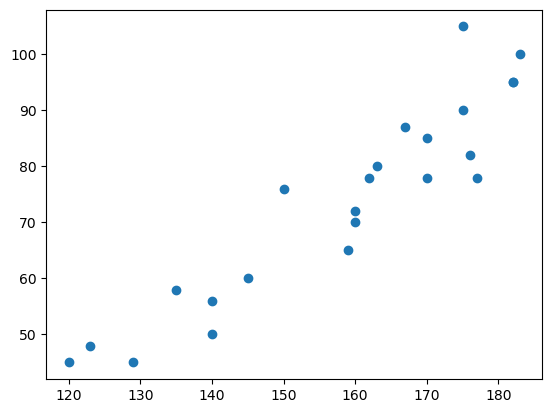

In [6]:
plt.scatter(Data['Height'],Data['Weight'])

# Creating Pair plot : 
its kind of a grid showing correlation among the variable or attributes

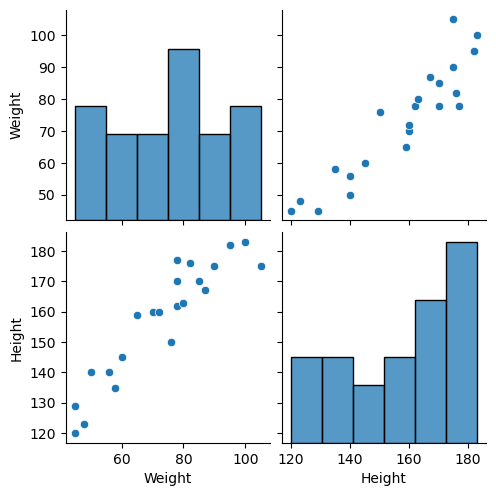

In [7]:
sns.pairplot(Data)

# Spliting the Data into train data and test data

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(6, 1)
(17,)
(6,)


## Step 3 : Strandardize the dataset 


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [11]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [12]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [13]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
    
LR.fit(X_train,y_train)


LinearRegression()

In [14]:
pred = LR.predict(X_train)

In [15]:
print("coefficient or slope : ", LR.coef_)
print("intercept : ", LR.intercept_)

coefficient or slope :  [17.2982057]
intercept :  156.47058823529412


In [22]:
X_train.shape

(17, 1)

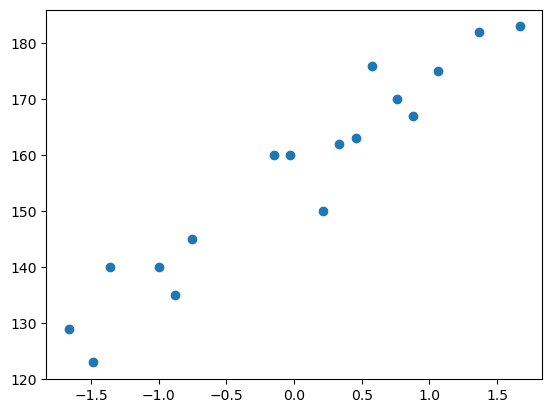

In [23]:
plt.scatter(X_train, y_train)

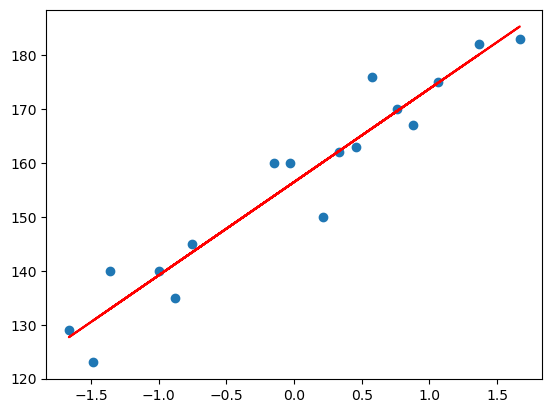

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train,pred, color = 'red')

<Axes: xlabel='Height', ylabel='Weight'>

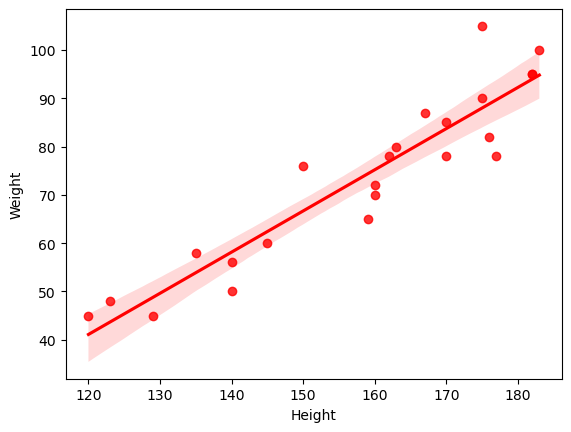

In [18]:
sns.regplot(x= Data["Height"],y = Data["Weight"], color = 'r')

In [19]:
y_pred = LR.predict(X_test)

# Performce Metrics
1. Mean Square error
2. Mean absolute error
3. root mean squared error
4. r2
5. adjusted r2

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)



print("MAE : ",mae)
print("MSE : ",mse)
print("RMSE : ",rmse)
print("Rsquared : ",r2)

MAE :  9.665125886795005
MSE :  114.84069295228699
RMSE :  10.716374991212605
Rsquared :  0.7360826717981276


# Linear Regression using OLS method

In [21]:
import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()

OLS_pred = model.predict(X_test)
print("predicted data :",OLS_pred)

print(model.summary())

predicted data : [  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]
                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 21 Jun 2025   Prob (F-statistic):                       0.664
Time:                        20:00:07   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef 

C:\Users\bhard\Downloads\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


## we can use Linear regression in two ways :
1. LR using gradient descent
2. LR using OLS estimators